## Problem Statement:
###### This is a classification problem where we have to automate the loan approval process persons's details collected while filling online application form

In [1]:
# import necessary packages
import pandas as pd # for reading the dataset
import numpy as np # for mathetical computations
# import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Test and Train Data
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
# view the dataset to ensure data has been read correctly
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Create a copy of original data which will be used for further computations
train_original = train.copy()
test_original = test.copy()

In [5]:
# Print data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


* the categorical features are object type, which we need to convert into numerical so as to feed into python machine learning algorithms. We one-hot-encode these variables before applying algorithms.
* also we can see there are some columns with missing values which need to be imputed.

In [6]:
# Shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

### Univariate analysis

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)
# we can see that this is not a sparse dataset.

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

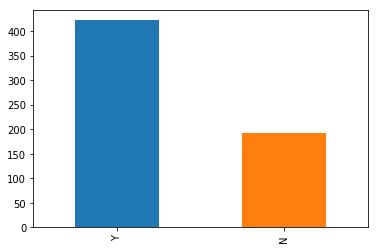

In [9]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

    we can see that 422 applications are approved out of 614 in training data. It means there are 69% chances of loan getting approved from given details. 
    Now we will visualize which are features that affect most the loan applicability.

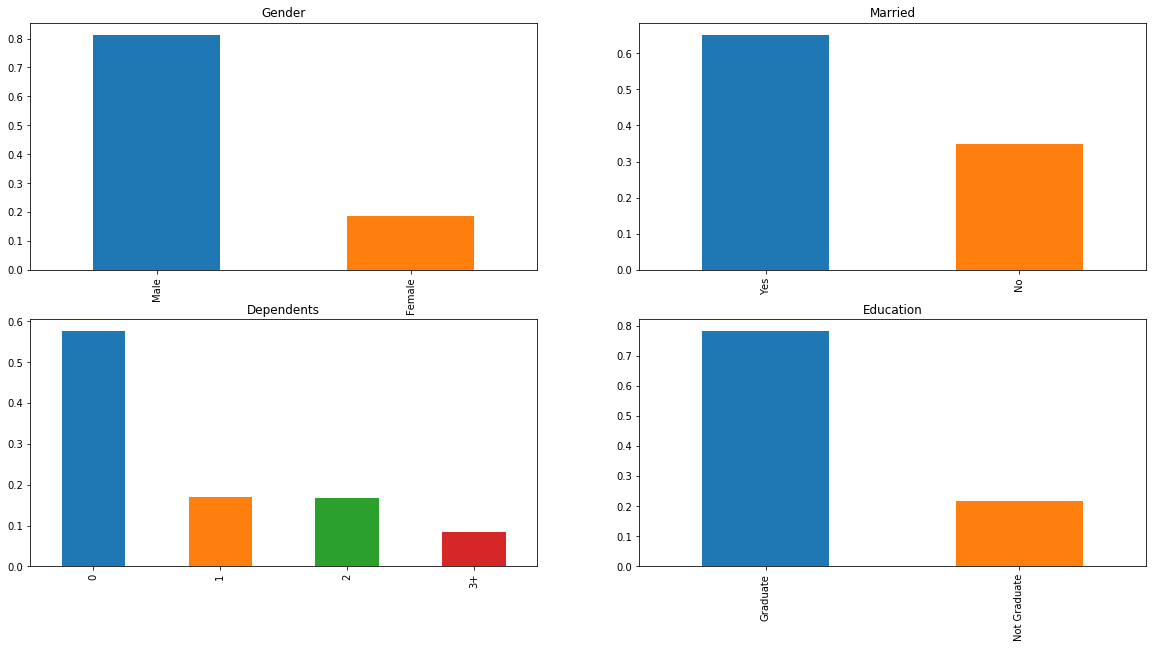

In [10]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

    from above univariate analysis it can be seen that:
* 80% of applicants are male, 
* 65% are married applicants,
* around 58% have no dependents in family
* around 78% are graduate applicants

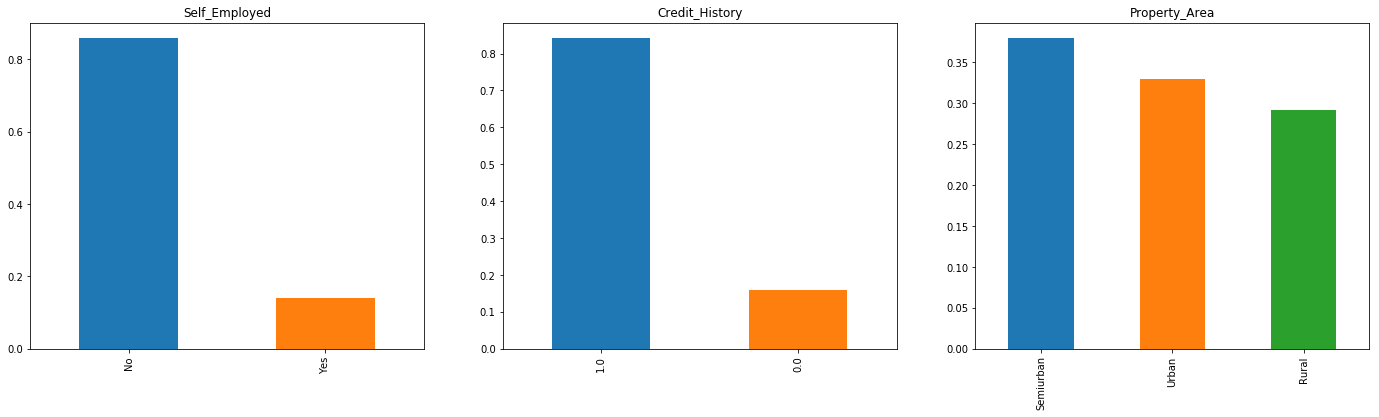

In [11]:
# Visualizing remaining categorical features
plt.figure(1)
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

    * there are only 15% self-employed applicants
    * around 85% applicants have repaid their debts
    * around 40% are from semiurban area, and least are from rural area (28%)

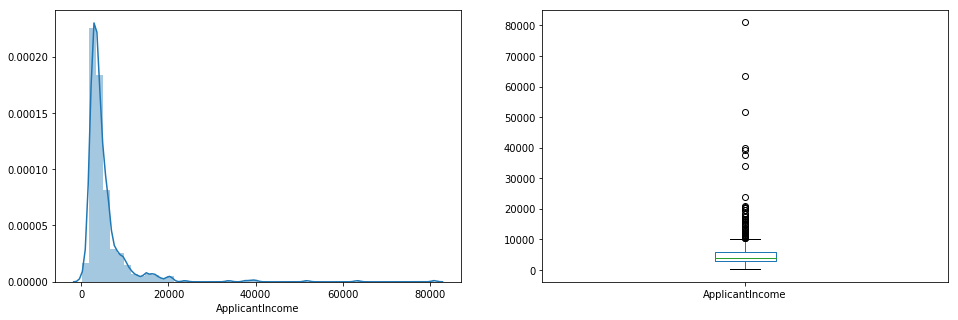

In [12]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

    Applicant Income data is not normally distributed, Also we can see outliers from boxplot, hence we need to scale the data to fix the data as well as handle the outliers. The high income of individuals is possible and hence instead of removing these outliers we will cap it to upper fence of boxplot.

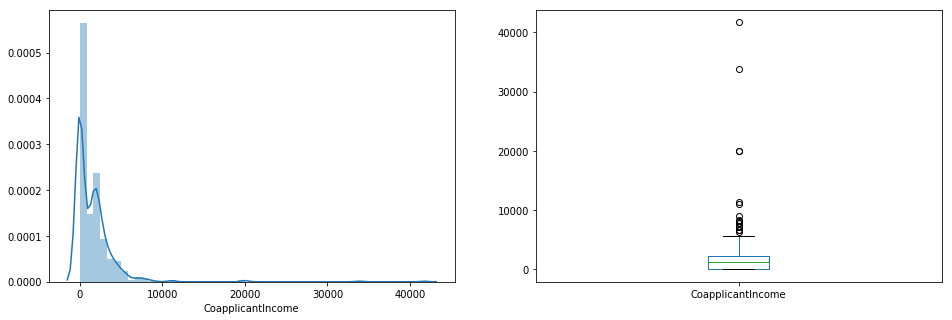

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

    coapplicant income too is not normally distributed and has outliers, which needs similar treatment as that of applicant income.

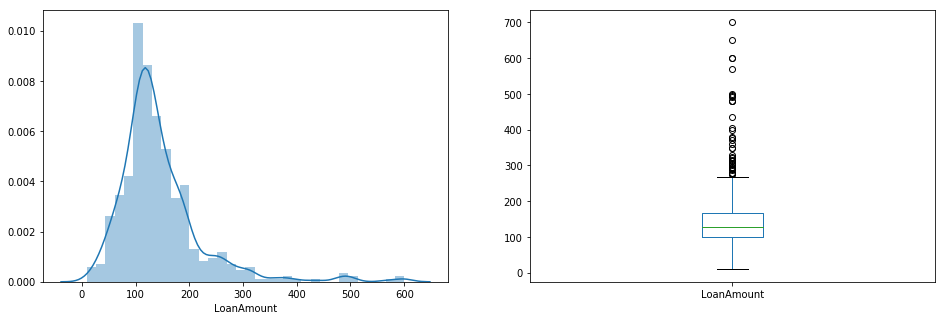

In [14]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

    we plot the distribution of LoanAmount variable by dropping the NA values temporarily (since column has 'NaN' value which does not allow to read the data in numerical format. 
    LoanAmount data is fairly normally distributed, and has too may outliers which need to be treated specially

### Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


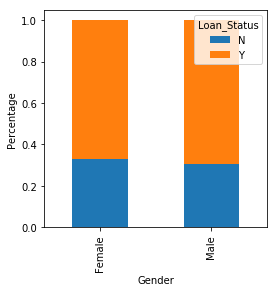

In [15]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

    proportion of male and female is almost same whether the loan is approved or not, hence we can say that gender hardly has any effect on loan approval

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


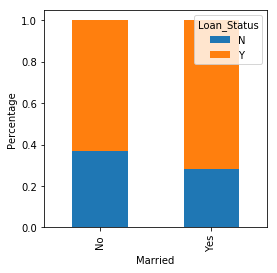

In [16]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

    married people have higher chances of getting loan approval than unmarried

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


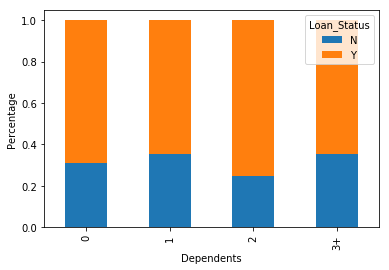

In [17]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

    applicants with no dependents have higher chances of loan approval than those with 1 or 3+ dependents.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


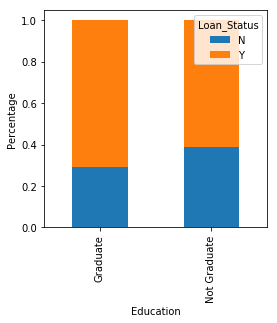

In [18]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

    proportion of graduate applicants is higher for approved loans than non-graduates

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


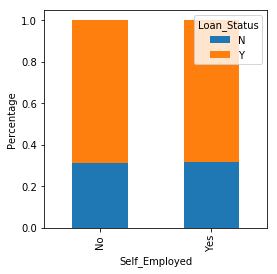

In [19]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

    we cannot make much inferences from applicant being self-employed or not from the data provided

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


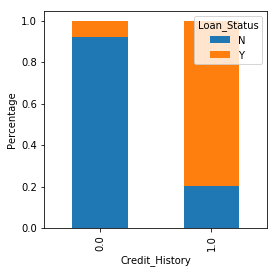

In [20]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

    It's pretty obvious that applicants with poor credit history have very very less chances of loan approval, as compared to those with good credit history

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


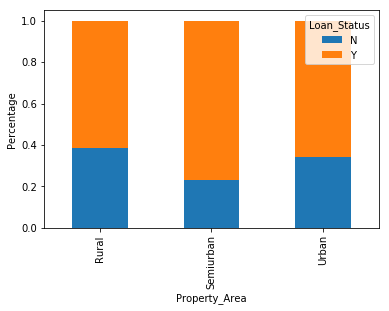

In [21]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

    it seems that proportion of loan getting approved in semiurban is higher than rural and urban areas

In [22]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

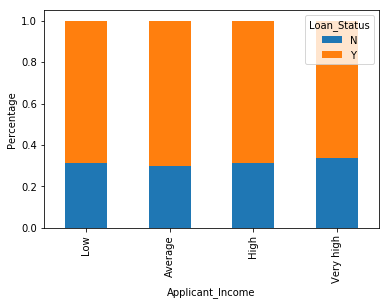

In [23]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicant_Income')
P = plt.ylabel('Percentage')

    Almost all the income groups have similar loan approval probabilities which is contradictory to universal assumption that higher the income better the chances of loan approval

In [24]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
# 0 value will be considered as missing hence need to replace with 'Low'
train['Coapplicant_Income_bin'].fillna('Low', inplace=True)

Loan_Status              N    Y
Coapplicant_Income_bin         
Low                     99  196
Average                 61  161
High                    32   65


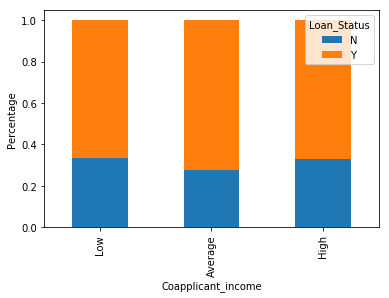

In [25]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
print(Coapplicant_Income_bin)
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Coapplicant_income')
P = plt.ylabel('Percentage')

    Surprisingly lower coapplicant income category has higher chances of loan getting approved, but this is not true. In data we have for more number of applicants with loan approved have co-applicants with 0 income, hence we see this kind of contradiction.
    To solve this problem we create a new variable with sum of applicant and coapplicant income

Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166


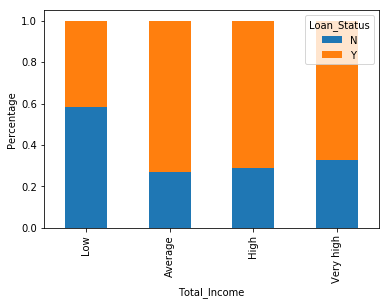

In [26]:
train['TotalIncome'] = train.ApplicantIncome + train.CoapplicantIncome

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['TotalIncome'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
print(Total_Income_bin)
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

    Now we can see that for higher income slabs proportion of loan approval is higher.

In [27]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

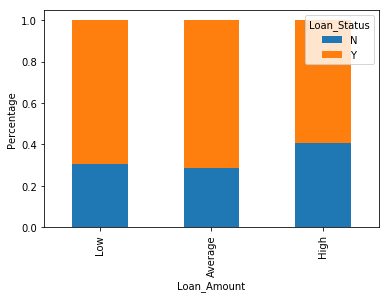

In [28]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan_Amount')
P = plt.ylabel('Percentage')

    proportion of loan getting approved is higher for lower loan amounts and less chances for high loan amounts

In [29]:
# Drop the new variable of bins
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'TotalIncome'], axis=1)

In [30]:
# replacing 3+ in Dependents variable with 3
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

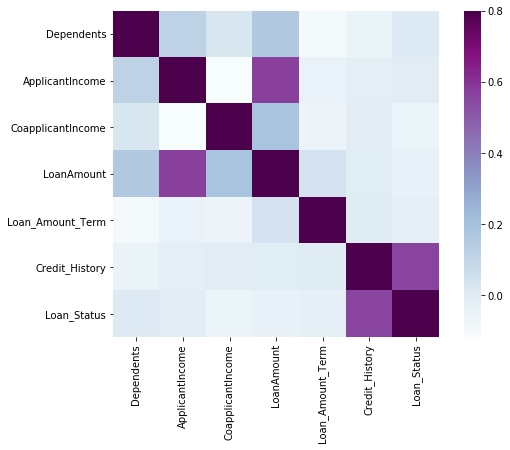

In [31]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()

    There is positive correlation all over the data, most correlated variables are LoanAmount-ApplicantIncome and Loan_Status-Credit_History

### Missing value and outlier treatment

In [32]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [34]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [36]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
# Similar changes in test file
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

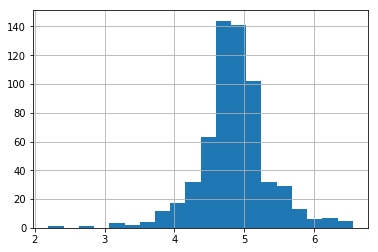

In [39]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [40]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [41]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [42]:
# Adding dummies to the dataset, one-hot-encoding the categorical variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [43]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Feature Engineering

In [44]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

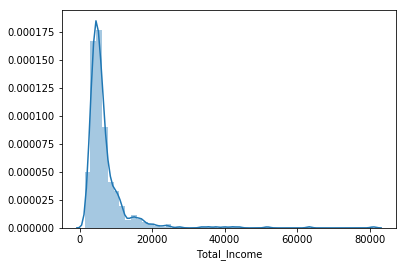

In [45]:
sns.distplot(train['Total_Income']);

    we see that the distribution is right skewed and hence we scale the data using log transformation

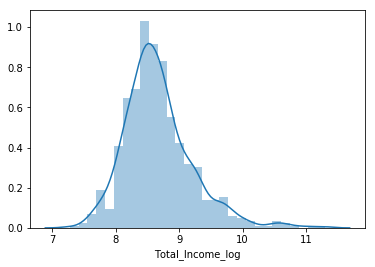

In [46]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

    now we observe scaled data is much closer to normal distribution and effect of extreme values has been taken careof

    Two of the very important features in loan application and approval are EMI and Balance left after each EMI, so we calculate both these columns using existing information we have.

In [47]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*1000

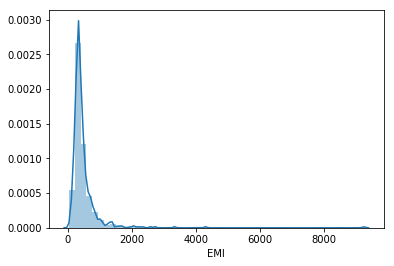

In [48]:
sns.distplot(train['EMI']);

In [49]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 
test['Balance Income']=test['Total_Income']-(test['EMI'])

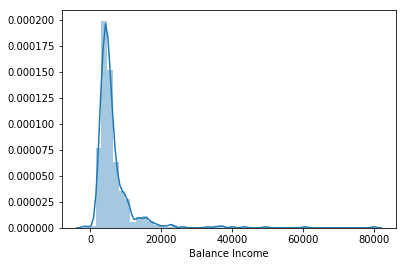

In [50]:
sns.distplot(train['Balance Income']);

### Logistic Regression

    Since the the dataset size is very small, we choose Stratified Sampling Technique to avois bias in data

In [51]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

In [52]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


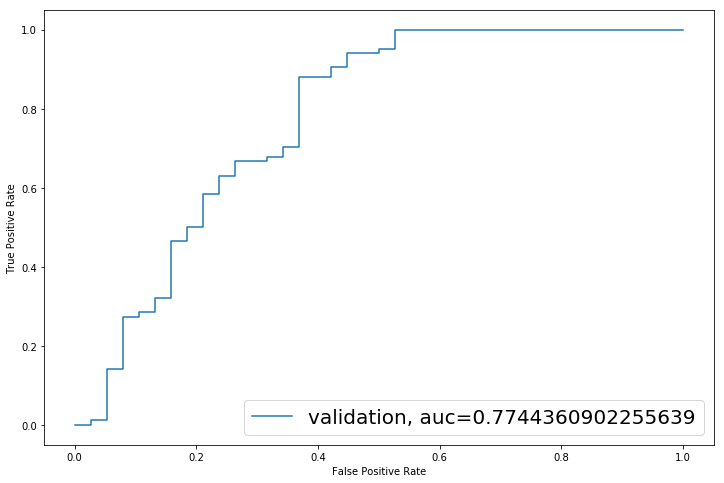

In [53]:
# ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize=20)
plt.show()